In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

### Loading the Dataset

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos['Price'] = pd.DataFrame(boston.target, columns=['Price'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = bos

In [6]:
X = bos.drop('Price', axis=1)
y = bos['Price']

D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


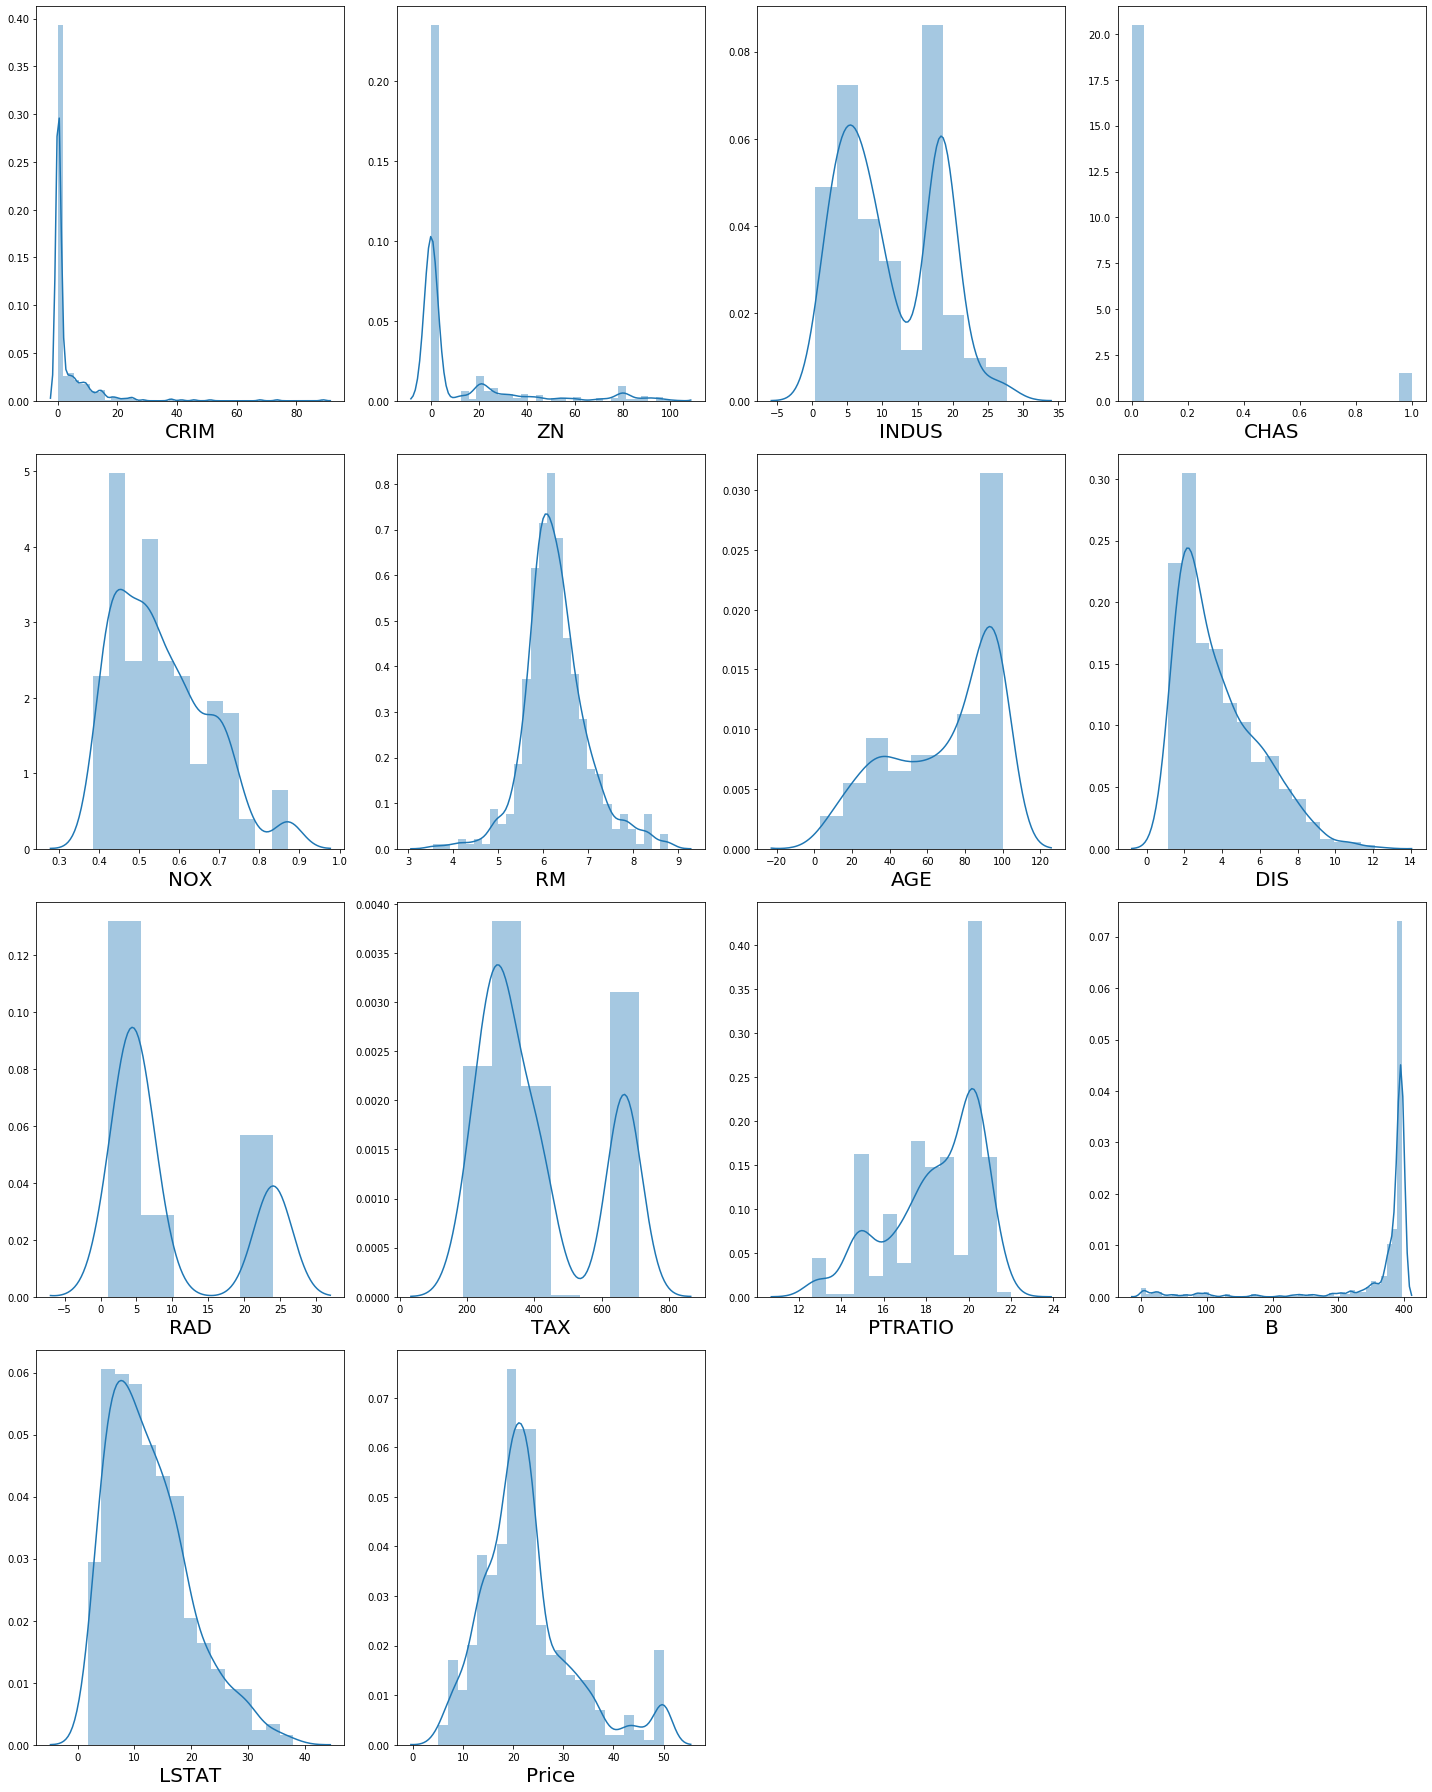

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

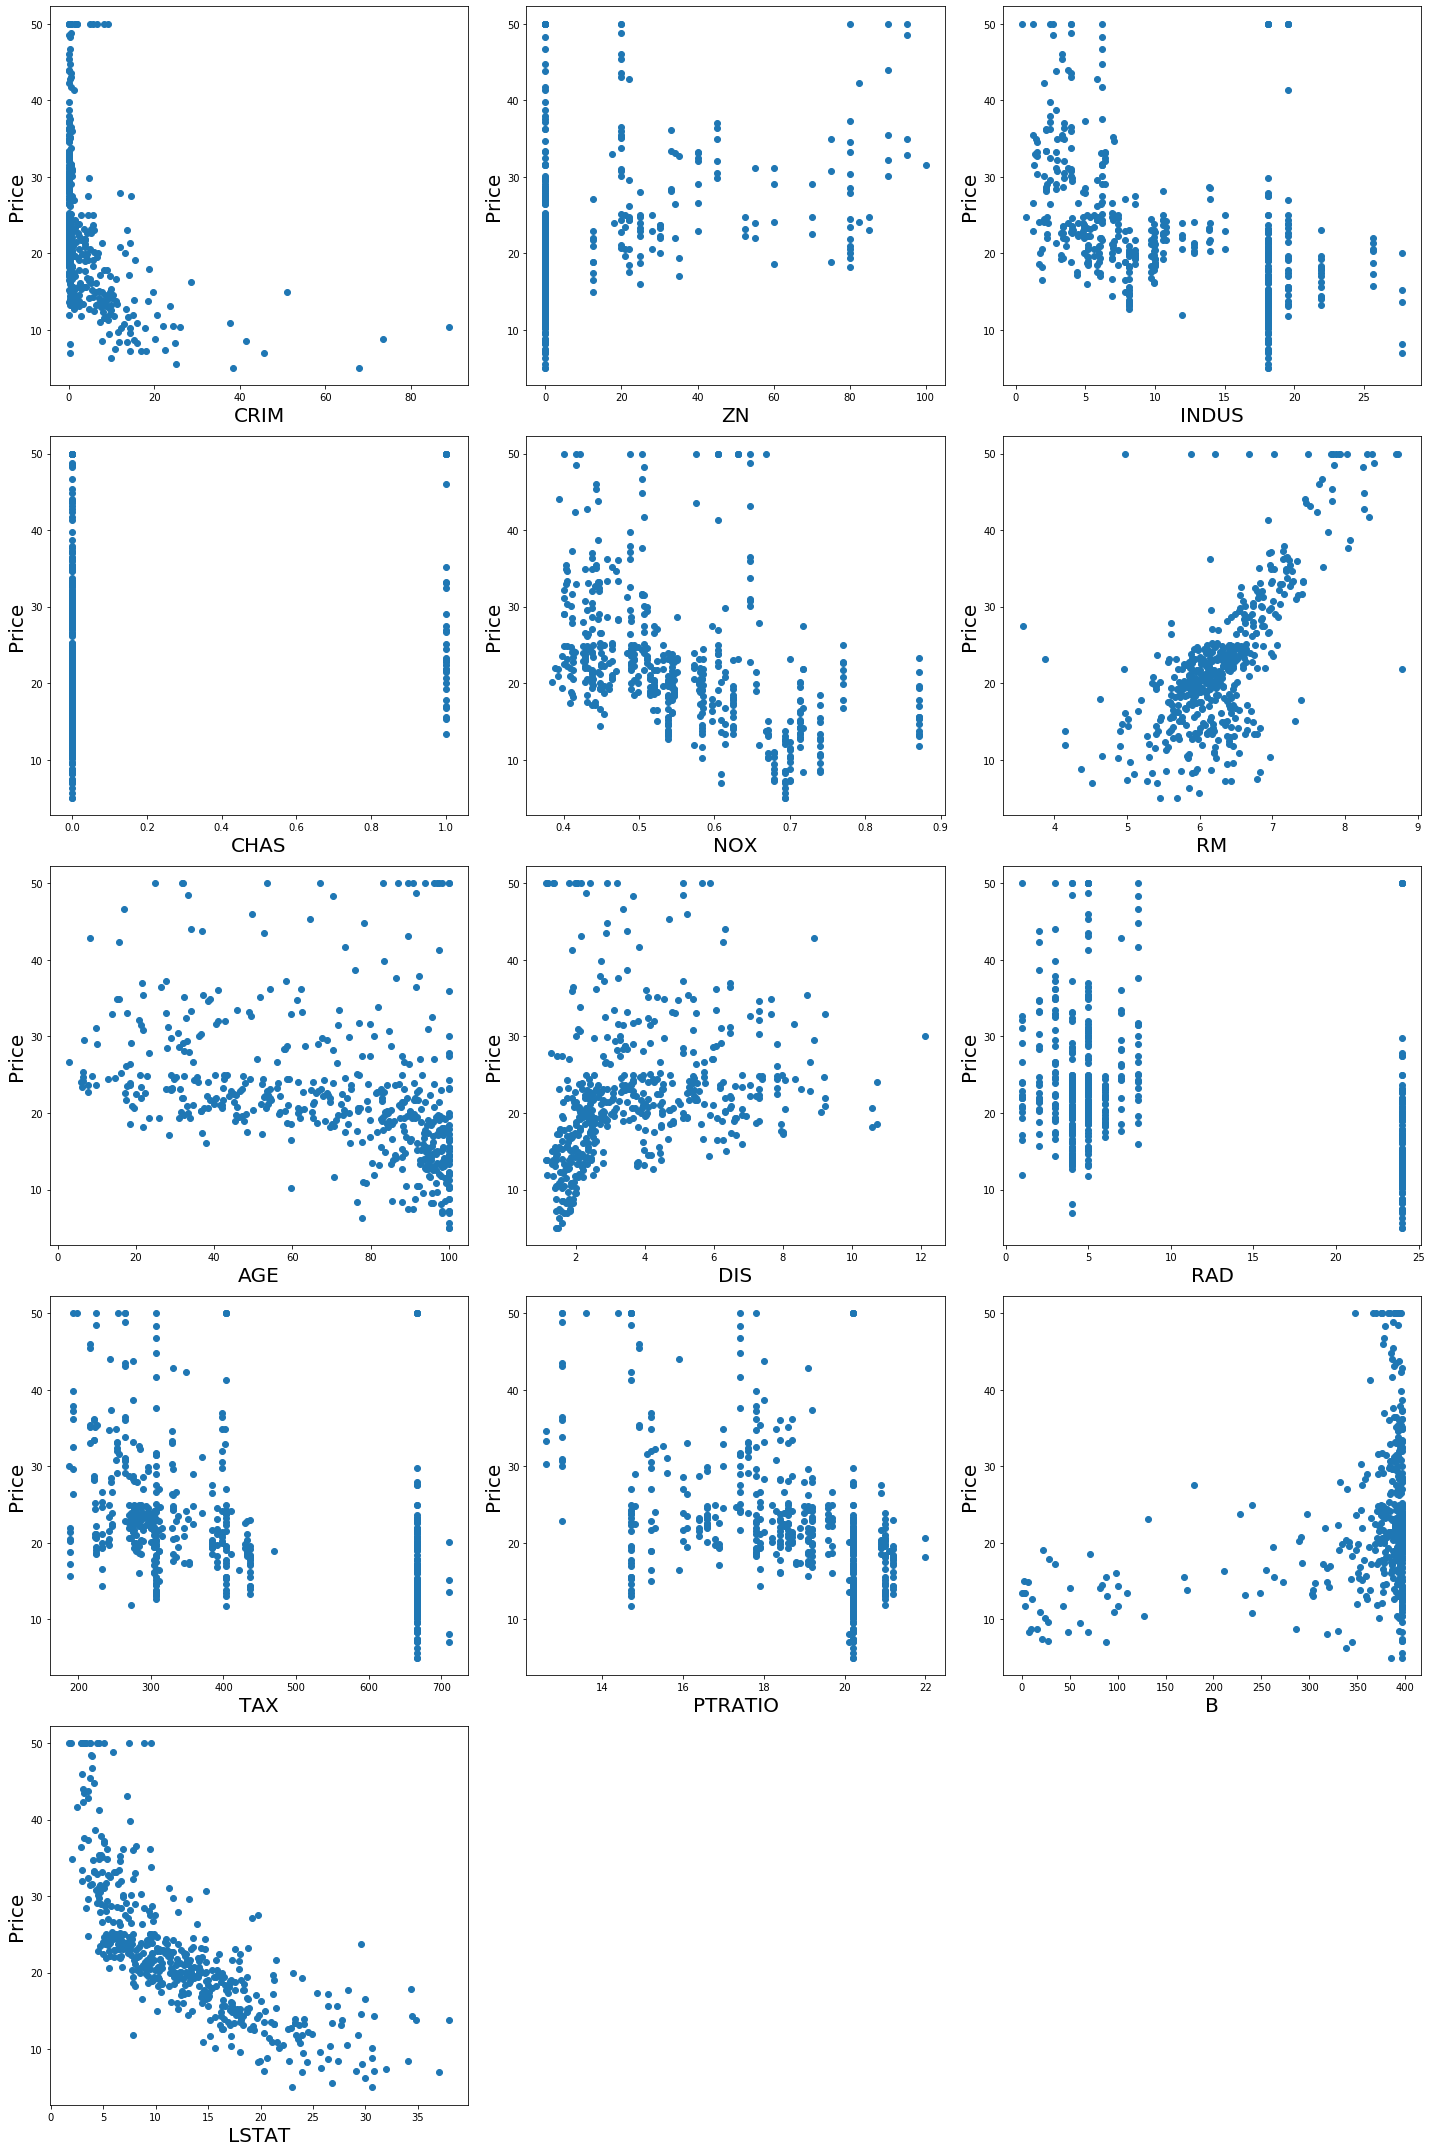

In [8]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**we can observe strong positive correlation between RM and Price** 

**We can observe weak positive correlation between DIS and Price**

**We can observe weak negative correlation between LSTAT and Price**

### Performing Linear Regression on the entire dataset

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

36.45948838509015
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


### Performing Ordinary Least Square Regression

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ CRIM +ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=data).fit()

In [11]:
lm.conf_int()

,0,1
Intercept,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        12:33:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We can observe from the p-values that null hypothesis cannot be regejcted for INDUS and AGE**

### Fitting the data to regularized models 

In [13]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Scaling the data using standardization

In [14]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [16]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


**All the VIF values are less than 10**

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=100)

In [18]:
y_train

459    20.0
46     20.0
50     19.7
308    22.8
19     18.2
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: Price, Length: 379, dtype: float64

In [19]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking Linear Regression score on the Data

In [20]:
regression.score(x_train,y_train)

0.7421573768304615

In [21]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

### Checking Adjusted R Square value as it penalises the model for adding non correlated variables

In [22]:
adj_r2(x_train,y_train)

0.7329739409367518

In [23]:
regression.score(x_test,y_test)

0.7246154314616728

### Using Lasso cross validation to get the best alpha value

In [24]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [25]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.000894639531962082

In [26]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.000894639531962082, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Checking Lasso Regression score on the Data

In [27]:
lasso_reg.score(x_test, y_test)

0.7245765117194072

### Using Ridge cross validation to get the best alpha value

In [28]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.21313016, 6.60111599, 7.26859305, 8.45277761, 4.49009179,
       6.54539972, 8.78050501, 5.0726146 , 3.48273913, 3.14417664,
       2.15757885, 8.07534136, 1.31278259, 7.22075725, 1.00949775,
       7.77229291, 1.87478602, 5.95674994, 7.72537985, 6.29382676,
       7.38452209, 6.39967429, 4.17485802, 0.35285808, 6.64364879,
       5.79010762, 0.31221812, 1.78821545, 3.67293586, 8.81805169,
       4.43147754, 8.74802077, 5.73694766, 1.57749496, 9.35025666,
       6.14865946, 2.21319609, 5.28528336, 8.53251397, 9.64584737,
       8.14420597, 5.57630046, 1.54500221, 4.11835109, 5.83978955,
       7.39222556, 7.27991298, 1.89461481, 4.80988502, 0.60936694]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [29]:
ridgecv.alpha_

0.312218116280375

In [30]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.312218116280375, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Checking Ridge Regression score on the Data

In [31]:
ridge_model.score(x_test, y_test)

0.7244615919567214

### Using Elastic Net cross validation to get the best alpha value

In [32]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [33]:
elasticCV.alpha_

0.018902313321062555

In [34]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [35]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.018902313321062555, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

### Checking Elastic Net Regression score on the Data

In [36]:
elasticnet_reg.score(x_test, y_test)

0.7221784347027663

In [37]:
print("OLS Regression Score is {:.4f}".format(regression.score(x_test,y_test)))
print("Lasso Regression Score is {:.4f}".format(lasso_reg.score(x_test, y_test)))
print("Ridge Regression Score is {:.4f}".format(ridge_model.score(x_test, y_test)))
print("Elastic Net Regression Score is {:.4f}".format(elasticnet_reg.score(x_test, y_test)))

OLS Regression Score is 0.7246
Lasso Regression Score is 0.7246
Ridge Regression Score is 0.7245
Elastic Net Regression Score is 0.7222


**We can see from the above scores that the model is not overfitting the data and that is the best score acheived yet.**

**From the density plots drawn at the start we can observe that few efatures are skewed. So we apply logrithmic transform on the data and build the models again.**

### Applying Log Transform to skewed features

In [38]:
X['CRIM'] = np.log(X['CRIM'])
X['NOX'] = np.log(X['NOX'])
X['AGE'] = np.log(X['AGE'])
X['DIS'] = np.log(X['DIS'])
X['PTRATIO'] = np.log(X['PTRATIO'])
X['LSTAT'] = np.log(X['LSTAT'])

D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


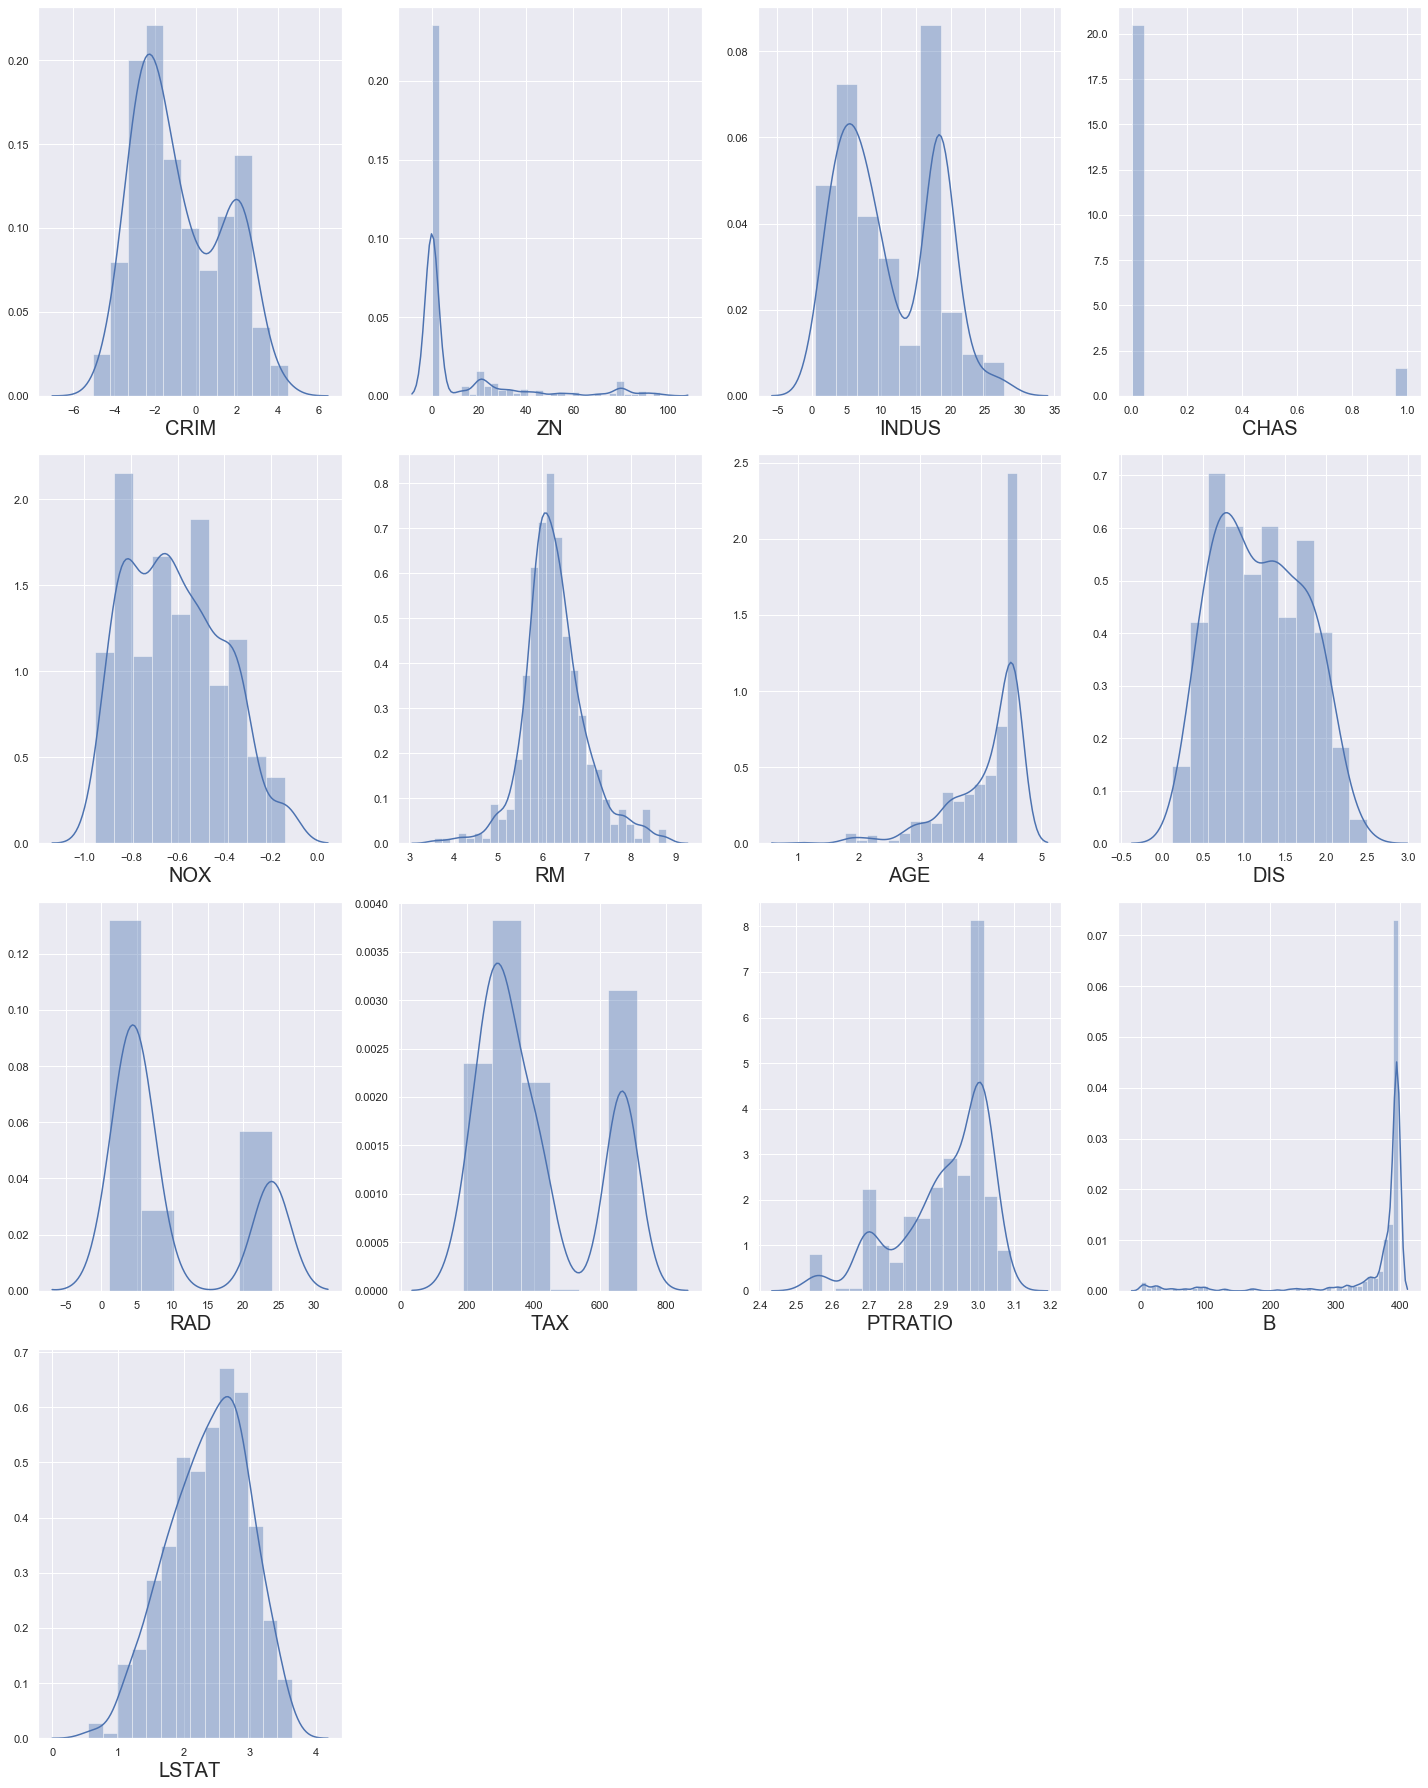

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [41]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,7.866593,CRIM
1,2.169161,ZN
2,4.106069,INDUS
3,1.073541,CHAS
4,6.134985,NOX
5,2.057153,RM
6,2.368649,AGE
7,4.874016,DIS
8,9.652829,RAD
9,9.002610,TAX


In [43]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=100)

In [44]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
regression.score(x_train,y_train)

0.8000300390350634

In [46]:
adj_r2(x_train,y_train)

0.7929078212472711

In [47]:
regression.score(x_test,y_test)

0.7633331128107594

In [48]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00201253503176986

In [50]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00201253503176986, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
lasso_reg.score(x_test, y_test)

0.7633049129031504

In [52]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.86352451, 3.10948278, 1.68230136, 8.49331993, 8.89532041,
       8.43397522, 0.30882704, 3.67998874, 0.02544268, 2.43242961,
       4.48760957, 2.48401878, 9.77594559, 7.43359722, 5.86877733,
       3.51075267, 3.30903173, 1.00815095, 9.00201684, 3.66813326,
       9.14152205, 3.58700246, 7.62413739, 4.03591721, 0.59858133,
       5.96830822, 5.86403785, 7.94333193, 3.04569711, 2.33729775,
       7.01500032, 6.81408121, 8.61401205, 2.85612507, 6.93173141,
       2.82581868, 2.84401876, 0.4618581 , 4.3921276 , 4.79217584,
       7.33506643, 8.87886261, 1.61279857, 0.72174429, 2.3259549 ,
       7.07078418, 7.16396251, 2.98114137, 5.75111724, 1.6864383 ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [53]:
ridgecv.alpha_

0.025442679804665858

In [54]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.025442679804665858, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [55]:
ridge_model.score(x_test, y_test)

0.7633237540370088

In [56]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [57]:
elasticCV.alpha_

0.016910891618495474

In [58]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [59]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.016910891618495474, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [60]:
elasticnet_reg.score(x_test, y_test)

0.761762172258607

In [61]:
print("OLS Regression Score is {:.4f}".format(regression.score(x_test,y_test)))
print("Lasso Regression Score is {:.4f}".format(lasso_reg.score(x_test, y_test)))
print("Ridge Regression Score is {:.4f}".format(ridge_model.score(x_test, y_test)))
print("Elastic Net Regression Score is {:.4f}".format(elasticnet_reg.score(x_test, y_test)))

OLS Regression Score is 0.7633
Lasso Regression Score is 0.7633
Ridge Regression Score is 0.7633
Elastic Net Regression Score is 0.7618


**We can see that applying log transfrom on the skewed features improved our regression score from 0.72 to 0.76**